# 4 GLMのモデル選択 --AICとモデルの予測のよさ--

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set()

In [6]:
d = pd.read_csv("./data/data3a.csv")

In [8]:
# 図4.1 左図の描画
formula = "y ~ 1"
model = smf.glm(data=d,
                formula=formula,
                family=sm.families.Poisson())
fit = model.fit()

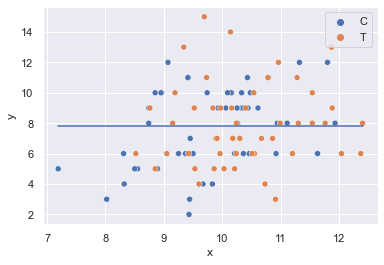

In [17]:
xx = np.linspace(d.x.min(), d.x.max(), 100)
lam = np.exp(fit.params['Intercept'])
sns.scatterplot(x='x', y='y', hue='f', data=d)
sns.lineplot(x=xx, y=lam)
plt.show()

In [43]:
# 図4.1 右図の描画
formula = "y ~ x + pow(x, 2) + pow(x, 3) + pow(x, 4) + pow(x, 5) + pow(x, 6)"
model = smf.glm(data=d,
                formula=formula,
                family=sm.families.Poisson())
fit = model.fit()

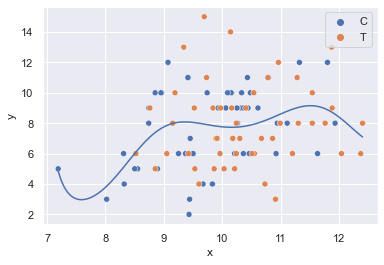

In [67]:
xx = np.linspace(d.x.min(), d.x.max(), 100)
lam = np.exp(fit.params['Intercept'] + fit.params['x'] * xx + fit.params['pow(x, 2)'] * xx**2 +
             fit.params['pow(x, 3)'] * xx**3 + fit.params['pow(x, 4)'] * xx**4 +
             fit.params['pow(x, 5)'] * xx**5 + fit.params['pow(x, 6)'] * xx**6)
sns.scatterplot(x='x', y='y', hue='f', data=d)
sns.lineplot(x=xx, y=lam)
plt.show()

In [45]:
# 図4.2の描画
formula = "y ~ 1"
model = smf.glm(data=d,
                formula=formula,
                family=sm.families.Poisson())
A = model.fit()

formula = "y ~ f"
model = smf.glm(data=d,
                formula=formula,
                family=sm.families.Poisson())
B = model.fit()

formula = "y ~ x"
model = smf.glm(data=d,
                formula=formula,
                family=sm.families.Poisson())
C = model.fit()

formula = "y ~ x + f"
model = smf.glm(data=d,
                formula=formula,
                family=sm.families.Poisson())
D = model.fit()

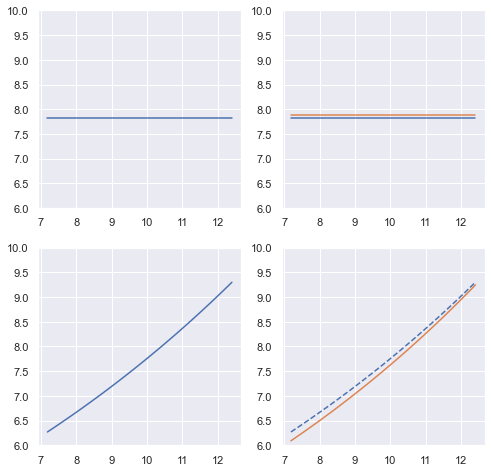

In [85]:
xx = np.linspace(d.x.min(), d.x.max(), 100)
ff = pd.get_dummies(d.f)

plt.figure(figsize=(8, 8))
plt.subplot(221)
lam = np.exp(A.params['Intercept'])
sns.lineplot(x=xx, y=lam)
plt.ylim(6, 10)

plt.subplot(222)
sns.lineplot(x=xx, y=lam, ls='--')
lam = np.exp(B.params['Intercept'] + np.sum(B.params['f[T.T]'] * ff, axis=1))
sns.lineplot(x=xx, y=lam)
plt.ylim(6, 10)

plt.subplot(223)
lam = np.exp(C.params['Intercept'] + C.params['x'] * xx)
sns.lineplot(x=xx, y=lam)
plt.ylim(6, 10)

plt.subplot(224)
sns.lineplot(x=xx, y=lam, ls='--')
lam = np.exp(D.params['Intercept'] + D.params['x'] * xx + np.sum(D.params['f[T.T]'] * ff, axis=1))
sns.lineplot(x=xx, y=lam)
plt.ylim(6, 10)

plt.show()

In [78]:
np.sum(ff * B.params['f[T.T]'], axis=1)

0     0.012772
1     0.012772
2     0.012772
3     0.012772
4     0.012772
        ...   
95    0.012772
96    0.012772
97    0.012772
98    0.012772
99    0.012772
Length: 100, dtype: float64